# ML tools and Data prep techniques

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Categorical-data" data-toc-modified-id="Categorical-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Categorical data</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>One Hot Encoding</a></span></li><li><span><a href="#Ordinal-Encoding" data-toc-modified-id="Ordinal-Encoding-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ordinal Encoding</a></span></li></ul></li><li><span><a href="#Missing-Data-Strategies" data-toc-modified-id="Missing-Data-Strategies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Missing Data Strategies</a></span><ul class="toc-item"><li><span><a href="#Do-nothing" data-toc-modified-id="Do-nothing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Do nothing</a></span></li><li><span><a href="#Zero-/-Constant" data-toc-modified-id="Zero-/-Constant-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Zero / Constant</a></span></li><li><span><a href="#Mean/Median" data-toc-modified-id="Mean/Median-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mean/Median</a></span></li><li><span><a href="#Most-frequent-value-(mode)" data-toc-modified-id="Most-frequent-value-(mode)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Most frequent value (mode)</a></span></li><li><span><a href="#KNN-imputer" data-toc-modified-id="KNN-imputer-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>KNN imputer</a></span></li></ul></li><li><span><a href="#Correlation-column-drop" data-toc-modified-id="Correlation-column-drop-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlation column drop</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Further-Resources-/-Articles" data-toc-modified-id="Further-Resources-/-Articles-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Further Resources / Articles</a></span></li></ul></div>

## Categorical data
We must deal with categorical data! Machines can only deal with numbers.

### One Hot Encoding
Remember to use the **same** encoding for training and test data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame([np.random.choice(["Dog","Cat","Horse","Hamster", "Araña"]) for _ in range(500)], columns=["animal"])
df.head()

,animal
0,Horse
1,Cat
2,Hamster
3,Horse
4,Dog


In [3]:
pd.get_dummies(df).head()

,animal_Araña,animal_Cat,animal_Dog,animal_Hamster,animal_Horse
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,1,0,0


In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
ohe = OneHotEncoder()
ohe.fit(df)

OneHotEncoder()

In [6]:
ohe.categories_

[array(['Araña', 'Cat', 'Dog', 'Hamster', 'Horse'], dtype=object)]

In [7]:
one_hot_encoded = ohe.transform(df)
one_hot_encoded 

<500x5 sparse matrix of type '<class 'numpy.float64'>'
	with 500 stored elements in Compressed Sparse Row format>

In [8]:
one_hot_encoded.todense()

matrix([[0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.]])

In [9]:
df_encoded = pd.DataFrame(one_hot_encoded.todense(), columns=ohe.categories_)

In [10]:
df_encoded.head()

,Araña,Cat,Dog,Hamster,Horse
0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0


In [11]:
ohe.inverse_transform([[1,0,0,0,0],[0,0,1,0,0],[0,0,0,0,1]])

array([['Araña'],
       ['Dog'],
       ['Horse']], dtype=object)

### Ordinal Encoding

In [12]:
df = pd.DataFrame([np.random.choice(["Bad","Regular","Good","Excelent","Supreme"]) for _ in range(500)], columns=["category"])
df.head()

,category
0,Supreme
1,Bad
2,Excelent
3,Excelent
4,Bad


In [13]:
encod = {
    "Bad":0,
    "Regular":1,
    "Good":2,
    "Excelent":3,
    "Supreme":4
}

In [14]:
df["ordinal"] = df["category"].apply(lambda x: encod[x])
df.head()

,category,ordinal
0,Supreme,4
1,Bad,0
2,Excelent,3
3,Excelent,3
4,Bad,0


## Missing Data Strategies

### Do nothing
Some Machine Learning Algorithms are more robust to missing values, less sensitive to them, than other, such as `XGBoost`. Or we can ignore the missing data.

That is, we could simply drop either features or data points with missing values. However, in both cases, we would be dealing with loss of data, specially when droping whole features (columns).

So in some cases, missing data will be no concern, but that is not true to most cases.

Let's see some different strategies to use in case we have missing data.

In [15]:
df = pd.read_csv("../datasets/beer.csv", encoding="latin-1")
df.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [16]:
df.shape

(73861, 23)

In [17]:
df.isnull().sum()

BeerID               0
Name                 1
URL                  0
Style              596
StyleID              0
Size(L)              0
OG                   0
FG                   0
ABV                  0
IBU                  0
Color                0
BoilSize             0
BoilTime             0
BoilGravity       2990
Efficiency           0
MashThickness    29864
SugarScale           0
BrewMethod           0
PitchRate        39252
PrimaryTemp      22662
PrimingMethod    67095
PrimingAmount    69087
UserId           50490
dtype: int64

In [18]:
df.dropna().shape # We lose almost all the data dropping the rows with nulls

(757, 23)

### Zero / Constant
Just stick any old value in there.

This is the fastest of all the methods, but probably the less accurate, unless you are trully sure that the missing values mean an unexistance, or zero value, of these attributes.

In [19]:
mash = pd.DataFrame(df["MashThickness"])
mash.head()

,MashThickness
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [20]:
mash.value_counts()

MashThickness
1.50000          15499
3.00000           8312
1.25000           4923
2.50000           1864
1.30000           1110
                 ...  
3.84300              1
3.88000              1
3.88880              1
3.91000              1
3.13013              1
Length: 567, dtype: int64

In [21]:
mash["zero_fill"] = mash["MashThickness"].fillna(0)

In [22]:
mash

,MashThickness,zero_fill
0,NaN,0.0
1,NaN,0.0
2,NaN,0.0
3,NaN,0.0
4,NaN,0.0
...,...,...
73856,3.0,3.0
73857,NaN,0.0
73858,NaN,0.0
73859,NaN,0.0


In [23]:
from sklearn.impute import SimpleImputer

In [24]:
si = SimpleImputer(strategy='constant', fill_value=0)

In [25]:
si.fit_transform(pd.DataFrame(mash["MashThickness"]))

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

### Mean/Median
Instead of just placing zeroes all around, we can calculate a value, such as mean or median to replace the missing.

This works well with small numerical datasets, but is not the most accurate method either, since it only considers a single column and not the relationship between different features.
It is, however, very fast and doesn't have a high computing cost.

It does not work with categorical features.

We should choose mean or median depending on our dataset.

If there are a lot of outliers, median is a best bet. If data is distributed uniformly or normally within a range, then the mean is safe. 

In [26]:
si_mean = SimpleImputer(strategy='mean')

In [27]:
mash["mean"] = si_mean.fit_transform(pd.DataFrame(mash["MashThickness"]))
mash

,MashThickness,zero_fill,mean
0,NaN,0.0,2.127235
1,NaN,0.0,2.127235
2,NaN,0.0,2.127235
3,NaN,0.0,2.127235
4,NaN,0.0,2.127235
...,...,...,...
73856,3.0,3.0,3.000000
73857,NaN,0.0,2.127235
73858,NaN,0.0,2.127235
73859,NaN,0.0,2.127235


In [28]:
#mash["MashThickness"][df["MashThickness"].isnull()] = 
mash["MashThickness"].mean()

2.127235233993227

In [29]:
mash["mean"].mean()

2.1272352339932263

In [30]:
si_median = SimpleImputer(strategy='median')

In [31]:
mash["median"] = si_median.fit_transform(pd.DataFrame(mash["MashThickness"]))
mash

,MashThickness,zero_fill,mean,median
0,NaN,0.0,2.127235,1.5
1,NaN,0.0,2.127235,1.5
2,NaN,0.0,2.127235,1.5
3,NaN,0.0,2.127235,1.5
4,NaN,0.0,2.127235,1.5
...,...,...,...,...
73856,3.0,3.0,3.000000,3.0
73857,NaN,0.0,2.127235,1.5
73858,NaN,0.0,2.127235,1.5
73859,NaN,0.0,2.127235,1.5


In [32]:
mash["MashThickness"].median()

1.5

In [33]:
mash["median"].median()

1.5

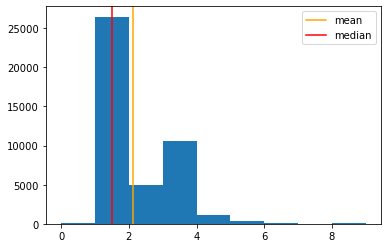

In [34]:
plt.hist(mash["MashThickness"], bins=[0,1,2,3,4,5,6,7,8,9])
plt.axvline(mash["MashThickness"].mean(), label="mean", c="orange")
plt.axvline(mash["MashThickness"].median(), label="median", c= "red")
plt.legend();

### Most frequent value (mode)
This is another value we can calculate as mean or median, but it does work with categorical values.

It has pretty much the same caracteristics of mean/median imputation and could introduce a lot of bias in the data.

In [35]:
df_cat = pd.DataFrame([np.random.choice(["Bad","Regular","Good","Excelent","Supreme", None]) for _ in range(500)], columns=["category"])
df_cat[df_cat["category"].isna()] = np.nan
df_cat.head()

,category
0,Excelent
1,Supreme
2,NaN
3,Good
4,Regular


In [36]:
si_mode = SimpleImputer(strategy="most_frequent")
df_cat["mode fill"] = si_mode.fit_transform(df_cat)
df_cat.head()

,category,mode fill
0,Excelent,Excelent
1,Supreme,Supreme
2,NaN,Regular
3,Good,Good
4,Regular,Regular


In [37]:
df_cat["category"].mode()

0    Regular
dtype: object

### KNN imputer
We can use the K nearest neighbors algorithm to impute the missing values.

It could take a lot more to process, specially with large datasets, but could also be more accurate.

This approach takes in account not just the feature with missing values, but all other features and finds the value for the missing by getting it from the data points more similar to this.

In [38]:
df.columns

Index(['BeerID', 'Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG',
       'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
       'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate',
       'PrimaryTemp', 'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

In [45]:
mash_sel = df[['Style', 'Size(L)', 'OG', 'FG',
               'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity',
               'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod']]

In [48]:
mash_sel = pd.get_dummies(mash_sel)

In [54]:
mash_sel.head()

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,...,Style_Wild Specialty Beer,Style_Winter Seasonal Beer,Style_Witbier,Style_Wood-Aged Beer,SugarScale_Plato,SugarScale_Specific Gravity,BrewMethod_All Grain,BrewMethod_BIAB,BrewMethod_Partial Mash,BrewMethod_extract
0,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,...,0,0,0,0,0,1,1,0,0,0
1,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,...,0,0,0,0,0,1,1,0,0,0
2,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,...,0,0,0,0,0,1,0,0,0,1
3,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,...,0,0,0,0,0,1,1,0,0,0
4,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,...,0,0,0,0,0,1,1,0,0,0


In [55]:
from sklearn.impute import KNNImputer

In [58]:
knn_imput = KNNImputer(n_neighbors=5)

In [60]:
knn_imput.fit_transform(mash_sel)

array([[21.77 ,  1.055,  1.013, ...,  0.   ,  0.   ,  0.   ],
       [20.82 ,  1.083,  1.021, ...,  0.   ,  0.   ,  0.   ],
       [18.93 ,  1.063,  1.018, ...,  0.   ,  0.   ,  1.   ],
       ...,
       [16.   ,  1.046,  1.008, ...,  1.   ,  0.   ,  0.   ],
       [24.   ,  1.051,  1.014, ...,  0.   ,  0.   ,  0.   ],
       [20.   ,  1.06 ,  1.01 , ...,  0.   ,  1.   ,  0.   ]])

In [ ]:
mash_sel = pd.DataFrame(mash_sel.transform(mash_sel.values), columns=mash_sel.columns)

## Correlation column drop
When analysing data for machine learning, it is a good idea to check the correlation of the columns.
Training a model with strongly correlated data may feed our model with redudant data, so we could reduce the features by removing features that are strongly correlated.

**Reasons**
- Make learning faster
- Decrease harmful bias
- Improve interpretability

In [66]:
from sklearn.datasets import load_boston
boston = load_boston()

In [70]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [71]:
X,y = load_boston(return_X_y=True)

In [72]:
boston_df = pd.DataFrame(X, columns=boston["feature_names"])

In [76]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [75]:
boston_df["MEDV"] = y
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [77]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [78]:
import seaborn as sns

<AxesSubplot:>

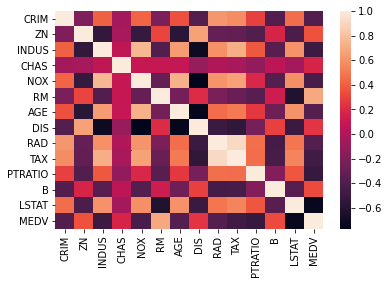

In [79]:
sns.heatmap(boston_df.corr())

<AxesSubplot:>

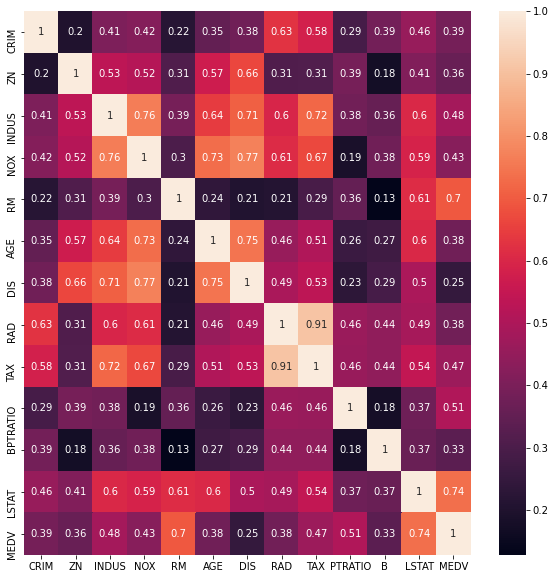

In [86]:
plt.figure(figsize=(10,10))
# We omit the CHAS variable simply because it is a dummy column
# which contains only values of 0 and 1.
sns.heatmap(boston_df.drop(columns=["CHAS"]).corr().abs(), annot=True)

In [100]:
from sklearn.model_selection import train_test_split
target = boston_df["MEDV"]
features = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
errors_train = []
errors_test = []
for cols in [[],["RAD"],["DIS"],['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B']]:
    lr = LinearRegression()
    lr.fit(X_train.drop(columns=cols), y_train)
    y_pred = lr.predict(X_train.drop(columns=cols))
    errors_train.append(mean_squared_error(y_pred,y_train))
    y_pred = lr.predict(X_test.drop(columns=cols))
    errors_test.append(mean_squared_error(y_pred,y_test))

In [111]:
errors_test

[21.995616122012052, 23.33347094526319, 23.929926268702523, 24.022250526258965]

In [112]:
errors_train

[22.257015179544435,
 23.145109912845264,
 24.848863908798727,
 28.040405874241213]

## Feature Scaling

![](https://miro.medium.com/max/2400/1*yR54MSI1jjnf2QeGtt57PA.png)

Machine Learning algorithms can be sensitive to the range of the data. Gradient-based models will converge much faster with scaled features. And distance-based models (_KNN, K-means, SVM, etc._) will be much more influenced by the feature with the largest range

**Normalization**
- Converts the data so it is on the [0,1] range

**Standardization**
- Converts data as to have $\mu = 0$ and $\sigma = 1$

<AxesSubplot:xlabel='AGE'>

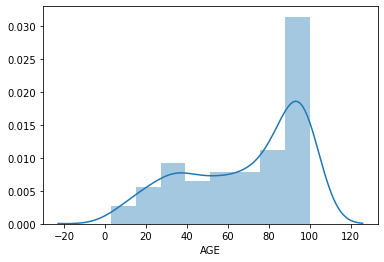

In [114]:
sns.distplot(boston_df["AGE"])

In [115]:
from sklearn.preprocessing import Normalizer

In [116]:
nor = Normalizer()

In [117]:
X_train = nor.fit_transform(X_train)

In [118]:
X_test = nor.transform(X_test)

In [121]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
errors_train = mean_squared_error(y_pred,y_train)
y_pred = lr.predict(X_test)
errors_test = mean_squared_error(y_pred,y_test)

In [122]:
errors_train

23.030423821132636

In [123]:
errors_test

17.28957329223768

In [124]:
from sklearn.preprocessing import StandardScaler, RobustScaler

## Further Resources / Articles
- [About Feature Scaling and Normalization](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)
- [Normalization vs Standardization — Quantitative analysis](https://www.kdnuggets.com/2019/04/normalization-vs-standardization-quantitative-analysis.html)
- [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)
- [Occam's Razor](https://en.wikipedia.org/wiki/Occam%27s_razor)
- [Are you dropping too many correlated features?](https://towardsdatascience.com/are-you-dropping-too-many-correlated-features-d1c96654abe6)
- [Normalization vs Standarization](https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb)